# Multivariate Gaussian Dist

This is obviously important for GP!

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%run ~/.jupyter/config.ipy

# Overview

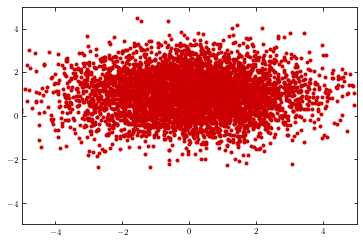

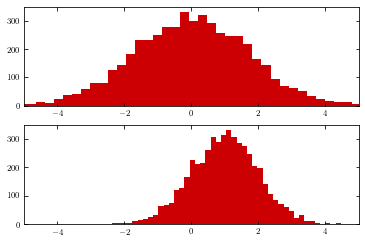

In [3]:
# Uncorrelated MV normal dist
# Note the diagonal cov matrix
data = np.random.multivariate_normal(
        np.array([0, 1]),
        np.array([
            [3, 0],
            [0, 1],
        ]),
        size = 5000,
)

# Together they are MV normal
_, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
ax.set(ylim=(-5, 5), xlim=(-5, 5))

# Each axis indepedently is normally distributed
_, axes = plt.subplots(2)
for i in range(2):
    axes[i].hist(data[:,i])
    axes[i].set(xlim=(-5, 5))

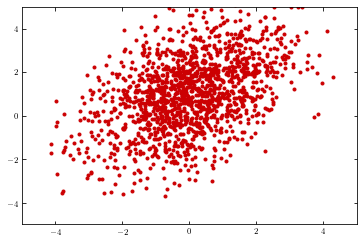

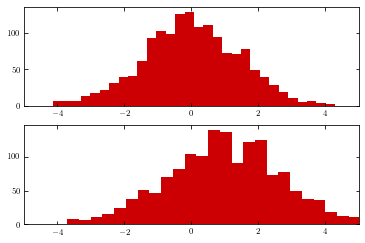

In [4]:
# Correlated MV normal dist
# Cov matrix is no longer diagonal. But is symmetric (cov(a,b) == cov(b,a))
data = np.random.multivariate_normal(
        np.array([0, 1]),
        np.array([
            [2, 1],
            [1, 3],
        ]),
        size = 1500,
)

# Together they are MV normal
_, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
ax.set(ylim=(-5, 5), xlim=(-5, 5))

# Each axis indepedently is normally distributed
_, axes = plt.subplots(2)
for i in range(2):
    axes[i].hist(data[:,i], bins=30)
    axes[i].set(xlim=(-5, 5))

# Meaning of off diagonal terms

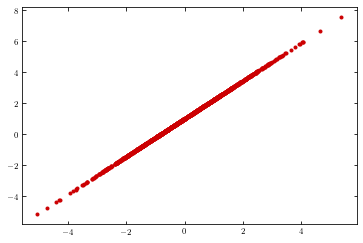

In [6]:
# We can determine the maximum covariance given the variance.
# Perfect correlation - a line
var1, var2 = 2, 3
max_cov = np.sqrt(var1) * np.sqrt(var2)
data = np.random.multivariate_normal(
        np.array([0, 1]),
        np.array([
            [var1, max_cov],
            [max_cov, var2],
        ]),
        size = 1500,
)

# Together they are MV normal
_, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
#ax.set(ylim=(-5, 5), xlim=(-5, 5))

# Meaning of the GP error terms

0.5068666666666667


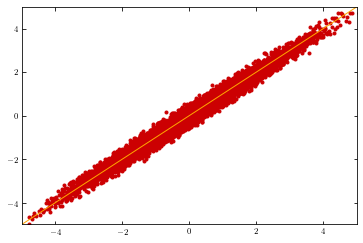

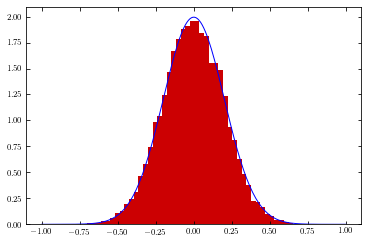

In [7]:
# What does the addition of the data error term in GP do?
var1, var2 = 2, 2
data_error = 0.2
max_cov = np.sqrt(var1) * np.sqrt(var2)
data = np.random.multivariate_normal(
        np.array([0, 0]),
        np.array([
            [var1 + data_error**2, max_cov          ],
            [max_cov             , var2],
        ]),
        size = 15000,
)
print(np.count_nonzero(data[:,0] > data[:,1]) / len(data))
# Together they are MV normal
_, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
ax.set(ylim=(-5, 5), xlim=(-5, 5))
ax.plot(np.linspace(-5, 5, num=200), np.linspace(-5, 5, num=200), color="orange")

# What does d[1] at fixed d[0] look like?
disp = data[:,1] - data[:,0]
_, ax = plt.subplots()
ax.hist(disp, bins=50, density=True)
test_x = np.linspace(-1, 1, num=200)
ax.plot(test_x, scipy.stats.norm(loc=0, scale=0.2).pdf(test_x))


# Adding the data error term takes the perfect correlation and smears it (convolves it?) with a gaussian
# with mean of 0 and std_dev of the data error.

# Probability of draw

Start with a univariate Gaussian,

$$
P(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( -\frac{1}{2} \frac{(x - \mu)^2}{\sigma^2} \right)
$$

more commonly we use the log probability,

$$
\log\,P(x | \mu, \sigma^2) =  \frac{1}{2}\left( -\log(2 \pi \sigma^2) - \frac{(x - \mu)^2}{\sigma^2}\right)
$$

In [3]:
def log_prob(x, mu, sigma2):
    return 0.5 * (-np.log(2 * np.pi * sigma2) - (x - mu)**2 / (sigma2))

x = np.random.random(10)
assert np.all(log_prob(x, 0, 1) == scipy.stats.norm(loc=0, scale=1).logpdf(x))

Fantastic, now what about a multivariate Gaussian?

$$
P(\vec{x} | \vec{\mu}, \Sigma) = \frac{1}{\sqrt{(2 \pi)^k | \Sigma |}} \exp\left( -\frac{1}{2} (\vec{x} - \vec{\mu})^T \Sigma^{-1} (\vec{x} - \vec{\mu}) \right)
$$

Note that this gives the probability of drawing that $\vec{x}$ (correct in all $k$ dimensions). Again, taking logs,

$$
\log\,P(\vec{x} | \vec{\mu}, \Sigma) = \frac{1}{2} \left(-  k \log (2 \pi) - \log (| \Sigma |) - (\vec{x} - \vec{\mu})^T \Sigma^{-1} (\vec{x} - \vec{\mu}) \right)
$$

assuming the common case in GP of $\mu = 0$,

$$
\log\,P(\vec{x} | \vec{\mu}, \Sigma) = \frac{1}{2} \left(-  k \log (2 \pi) - \log (| \Sigma |) - \vec{x}^T \Sigma^{-1} \vec{x} \right)
$$

which can be simply explained as the probability goes:
* down with increasing dimension ($k$)
* down with $\vec{x}$ far from $\vec{\mu}$
* up or down with changes to the covariance (depending on where $\vec{x}$ is)